# Importing the necessary libraries 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
raw_Data = pd.read_csv('jobs_in_data_2024.csv')
raw_Data.head()

work_year experience_level employment_type               job_title  salary  \
0       2024      Entry-level       Freelance  Applied Data Scientist   30000   
1       2024        Executive       Full-time   Business Intelligence  230000   
2       2024        Executive       Full-time   Business Intelligence  176900   
3       2024           Senior       Full-time          Data Architect  171210   
4       2024           Senior       Full-time          Data Architect   92190   

  salary_currency  salary_in_usd employee_residence work_setting  \
0             USD          30000     United Kingdom       Remote   
1             USD         230000      United States    In-person   
2             USD         176900      United States    In-person   
3             USD         171210             Canada    In-person   
4             USD          92190             Canada    In-person   

  company_location company_size                    job_category  
0   United Kingdom            M       Data Science and Research  
1    United States            M            BI and Visualization  
2    United States            M            BI and Visualization  
3           Canada            M  Data Architecture and Modeling  
4           Canada            M  Data Architecture and Modeling

In [3]:
raw_Data.describe()

work_year         salary  salary_in_usd
count  14199.000000   14199.000000    14199.00000
mean    2023.110501  149057.514262   149472.04944
std        0.686929   64932.044143    64379.26016
min     2020.000000   14000.000000    15000.00000
25%     2023.000000  102150.000000   104000.00000
50%     2023.000000  142000.000000   142000.00000
75%     2024.000000  185900.000000   185900.00000
max     2024.000000  450000.000000   450000.00000

This shows that there is only 1 numerical data in the dataset that we will be using which is salary in usd, the rest of the columns in the dataset are categorical data.

### Numerical Data

In [4]:
salary_Data = raw_Data[['work_year', 'salary_in_usd']].copy() 
salary_Data

work_year  salary_in_usd
0           2024          30000
1           2024         230000
2           2024         176900
3           2024         171210
4           2024          92190
...          ...            ...
14194       2021         165000
14195       2020         412000
14196       2021         151000
14197       2020         105000
14198       2020         100000

[14199 rows x 2 columns]

In [5]:
salary_in_usd = pd.DataFrame(raw_Data['salary_in_usd'])

<Axes: >

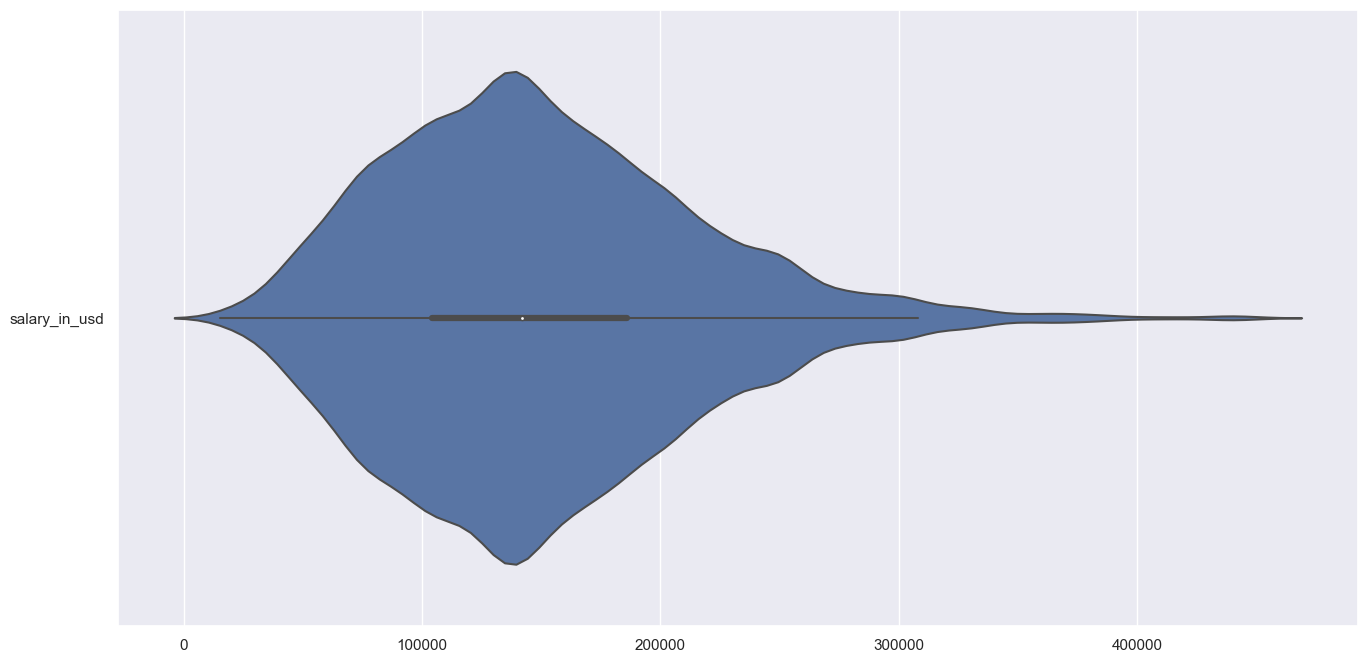

In [6]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = salary_in_usd, orient = "h")

As seen from the violin plot, the yearly salaries are widely distributed with the interquartile range being roughly between 100000 and 190000

In [7]:
salary_in_usd.describe()

salary_in_usd
count    14199.00000
mean    149472.04944
std      64379.26016
min      15000.00000
25%     104000.00000
50%     142000.00000
75%     185900.00000
max     450000.00000

### However, these salaries are not adjusted for inflations 

In [8]:
us_inflation_rates = {2020: 0.012, 2021: 0.047, 2022: 0.080, 2023: 0.041}
global_inflation_rates = {2020: 0.032, 2021: 0.047, 2022: 0.087, 2023: 0.069}

def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return int(original_salary)  # Convert to integer

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return int(round(adjusted_salary))  # Round and convert to integer

raw_Data['adjusted_salary'] = raw_Data.apply(adjust_salary, axis=1)

In [9]:
raw_Data

work_year experience_level employment_type                 job_title  \
0           2024      Entry-level       Freelance    Applied Data Scientist   
1           2024        Executive       Full-time     Business Intelligence   
2           2024        Executive       Full-time     Business Intelligence   
3           2024           Senior       Full-time            Data Architect   
4           2024           Senior       Full-time            Data Architect   
...          ...              ...             ...                       ...   
14194       2021           Senior       Full-time           Data Specialist   
14195       2020           Senior       Full-time            Data Scientist   
14196       2021        Mid-level       Full-time  Principal Data Scientist   
14197       2020      Entry-level       Full-time            Data Scientist   
14198       2020      Entry-level        Contract     Business Data Analyst   

       salary salary_currency  salary_in_usd employee_residence work_setting  \
0       30000             USD          30000     United Kingdom       Remote   
1      230000             USD         230000      United States    In-person   
2      176900             USD         176900      United States    In-person   
3      171210             USD         171210             Canada    In-person   
4       92190             USD          92190             Canada    In-person   
...       ...             ...            ...                ...          ...   
14194  165000             USD         165000      United States       Remote   
14195  412000             USD         412000      United States       Remote   
14196  151000             USD         151000      United States       Remote   
14197  105000             USD         105000      United States       Remote   
14198  100000             USD         100000      United States       Remote   

      company_location company_size                    job_category  \
0       United Kingdom            M       Data Science and Research   
1        United States            M            BI and Visualization   
2        United States            M            BI and Visualization   
3               Canada            M  Data Architecture and Modeling   
4               Canada            M  Data Architecture and Modeling   
...                ...          ...                             ...   
14194    United States            L    Data Management and Strategy   
14195    United States            L       Data Science and Research   
14196    United States            L       Data Science and Research   
14197    United States            S       Data Science and Research   
14198    United States            L                   Data Analysis   

       adjusted_salary  
0                30000  
1               230000  
2               176900  
3               171210  
4                92190  
...                ...  
14194           186575  
14195           471464  
14196           170745  
14197           120155  
14198           114433  

[14199 rows x 13 columns]

In [10]:
adjusted_salary_in_usd = pd.DataFrame(raw_Data['adjusted_salary'])

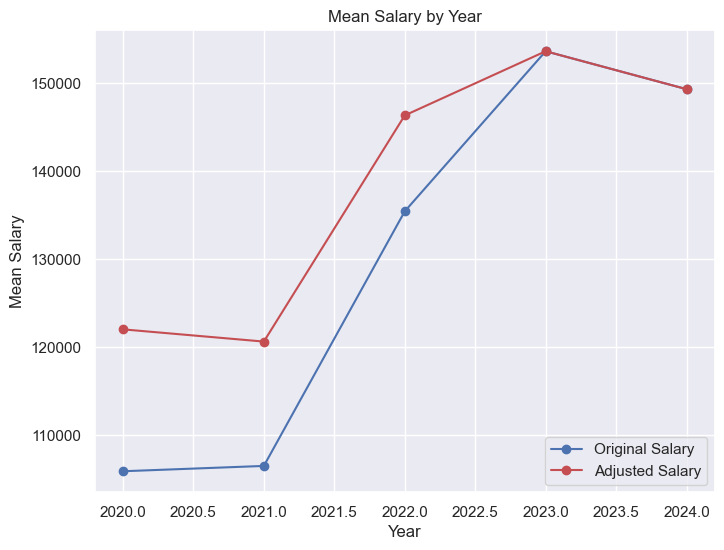

In [11]:



mean_salary_by_year_original = raw_Data.groupby('work_year')['salary_in_usd'].mean()
mean_salary_by_year_adjusted = raw_Data.groupby('work_year')['adjusted_salary'].mean()

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(mean_salary_by_year_original.index, mean_salary_by_year_original.values, marker='o', color='b', label='Original Salary')
plt.plot(mean_salary_by_year_adjusted.index, mean_salary_by_year_adjusted.values, marker='o', color='r', label='Adjusted Salary')
plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Year')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Cleaning the data

### Checking for missing Data

In [12]:
null_Data = raw_Data.isnull().sum()
print(null_Data)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
adjusted_salary       0
dtype: int64


No missing data found 

### Removing the outliers

Since it wouldn't be realistic for most to receive the jobs with the outliers on the right or there could be erronous entry and it wouldn't be a "good" job if we were to draw a salary much lower than the IQR

In [13]:
# Outliers in adjusted_salary
Q1_SalaryData = raw_Data['adjusted_salary'].quantile(0.25)
Q3_SalaryData = raw_Data['adjusted_salary'].quantile(0.75)
IQR_SalaryData = Q3_SalaryData - Q1_SalaryData

# Identify outliers in both columns
threshold = 1.5
outlier_mask_SalaryData = (raw_Data['adjusted_salary'] < Q1_SalaryData - threshold * IQR_SalaryData) | (raw_Data['adjusted_salary'] > Q3_SalaryData + threshold * IQR_SalaryData)

# Combine outlier masks for both columns
print(outlier_mask_SalaryData.sum())
# Remove outliers from the dataset
cleaned_df = raw_Data[~outlier_mask_SalaryData]

cleaned_df.shape

231


(13968, 13)

In [14]:
cleaned_df.describe()

work_year         salary  salary_in_usd  adjusted_salary
count  13968.000000   13968.000000   13968.000000     13968.000000
mean    2023.108963  145705.571664  146093.474943    147591.394187
std        0.685444   59766.401242   59059.676975     59305.409248
min     2020.000000   14000.000000   15000.000000     16000.000000
25%     2023.000000  100000.000000  102100.000000    104450.000000
50%     2023.000000  140100.000000  140100.000000    142200.000000
75%     2024.000000  185000.000000  185000.000000    185800.000000
max     2024.000000  409500.000000  315000.000000    315000.000000

### Duplicate Data

In [15]:
duplicate_Data = cleaned_df.duplicated()
cleaned_df[duplicate_Data]

work_year experience_level employment_type           job_title  salary  \
61          2024           Senior       Full-time      Data Scientist  190000   
62          2024           Senior       Full-time      Data Scientist  155000   
124         2024           Senior       Full-time      Data Scientist   70000   
143         2024           Senior       Full-time  Research Scientist  234000   
144         2024           Senior       Full-time  Research Scientist  146000   
...          ...              ...             ...                 ...     ...   
13923       2022        Mid-level       Full-time      Data Scientist   78000   
13924       2022           Senior       Full-time       Data Engineer  135000   
13925       2022           Senior       Full-time       Data Engineer  115000   
14058       2021        Mid-level       Full-time       Data Engineer  200000   
14158       2021        Mid-level       Full-time      Data Scientist   76760   

      salary_currency  salary_in_usd employee_residence work_setting  \
61                USD         190000      United States       Remote   
62                USD         155000      United States       Remote   
124               GBP          87500     United Kingdom    In-person   
143               USD         234000      United States    In-person   
144               USD         146000      United States    In-person   
...               ...            ...                ...          ...   
13923             USD          78000      United States       Remote   
13924             USD         135000      United States       Remote   
13925             USD         115000      United States       Remote   
14058             USD         200000      United States       Remote   
14158             EUR          90734            Germany       Hybrid   

      company_location company_size               job_category  \
61       United States            M  Data Science and Research   
62       United States            M  Data Science and Research   
124     United Kingdom            M  Data Science and Research   
143      United States            M  Data Science and Research   
144      United States            M  Data Science and Research   
...                ...          ...                        ...   
13923    United States            M  Data Science and Research   
13924    United States            M           Data Engineering   
13925    United States            M           Data Engineering   
14058    United States            L           Data Engineering   
14158          Germany            L  Data Science and Research   

       adjusted_salary  
61              190000  
62              155000  
124              87500  
143             234000  
144             146000  
...                ...  
13923            84240  
13924           145800  
13925           124200  
14058           226152  
14158           103263  

[5417 rows x 13 columns]

However, we would not remove the duplicated data as it is realistic that 2 individual with the same job at the same company will draw the same salary

### Exporting the Cleaned dataset

In [16]:
cleaned_df.to_csv('cleaned_Jobs&Salaries.csv')

In [17]:
cleaned_salary_Data = cleaned_df[['work_year', 'adjusted_salary']].copy() 
cleaned_salary_Data

work_year  adjusted_salary
0           2024            30000
1           2024           230000
2           2024           176900
3           2024           171210
4           2024            92190
...          ...              ...
14193       2021            32286
14194       2021           186575
14196       2021           170745
14197       2020           120155
14198       2020           114433

[13968 rows x 2 columns]

In [18]:
cleaned_salary_Data.corr()

work_year  adjusted_salary
work_year         1.000000         0.026825
adjusted_salary   0.026825         1.000000

<Axes: >

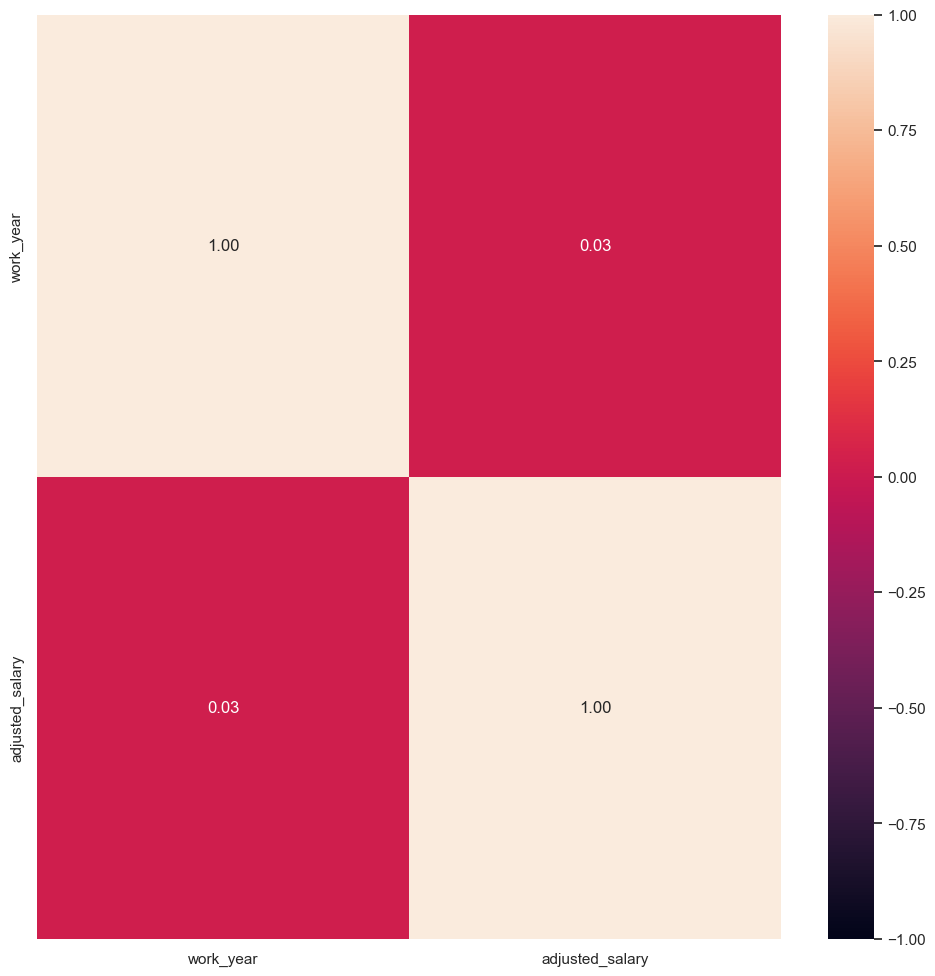

In [19]:
f = plt.figure(figsize=(12,12))
sb.heatmap(cleaned_salary_Data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

There is no corrolation between the annual salaries and work year

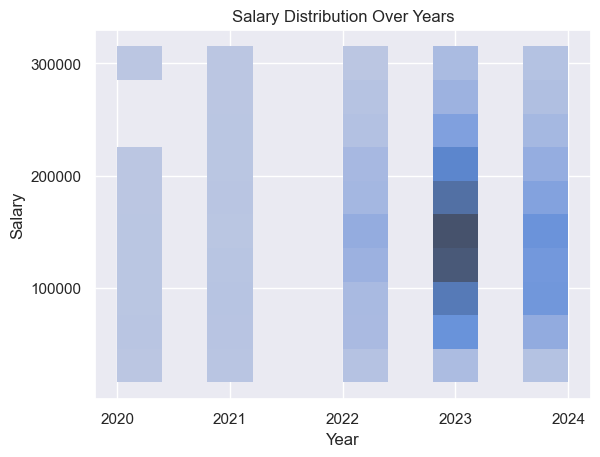

In [20]:
sb.histplot(data = cleaned_salary_Data, x = "work_year", y = "adjusted_salary", bins=10, kde=True)
plt.title('Salary Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Salary')
sb.set_context("poster")
plt.show()

### Categorical Data

In [21]:
cleaned_salary_Data["work_year"].value_counts()

work_year
2023    8361
2024    3729
2022    1616
2021     195
2020      67
Name: count, dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


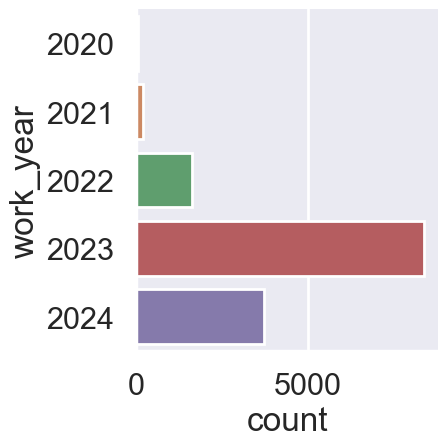

In [22]:
sb.catplot(y = "work_year", data = cleaned_salary_Data, kind = "count")


From this histogram and catplot we can see that a majority of data comes from 2023 and 2024

Lets compare work year with salary

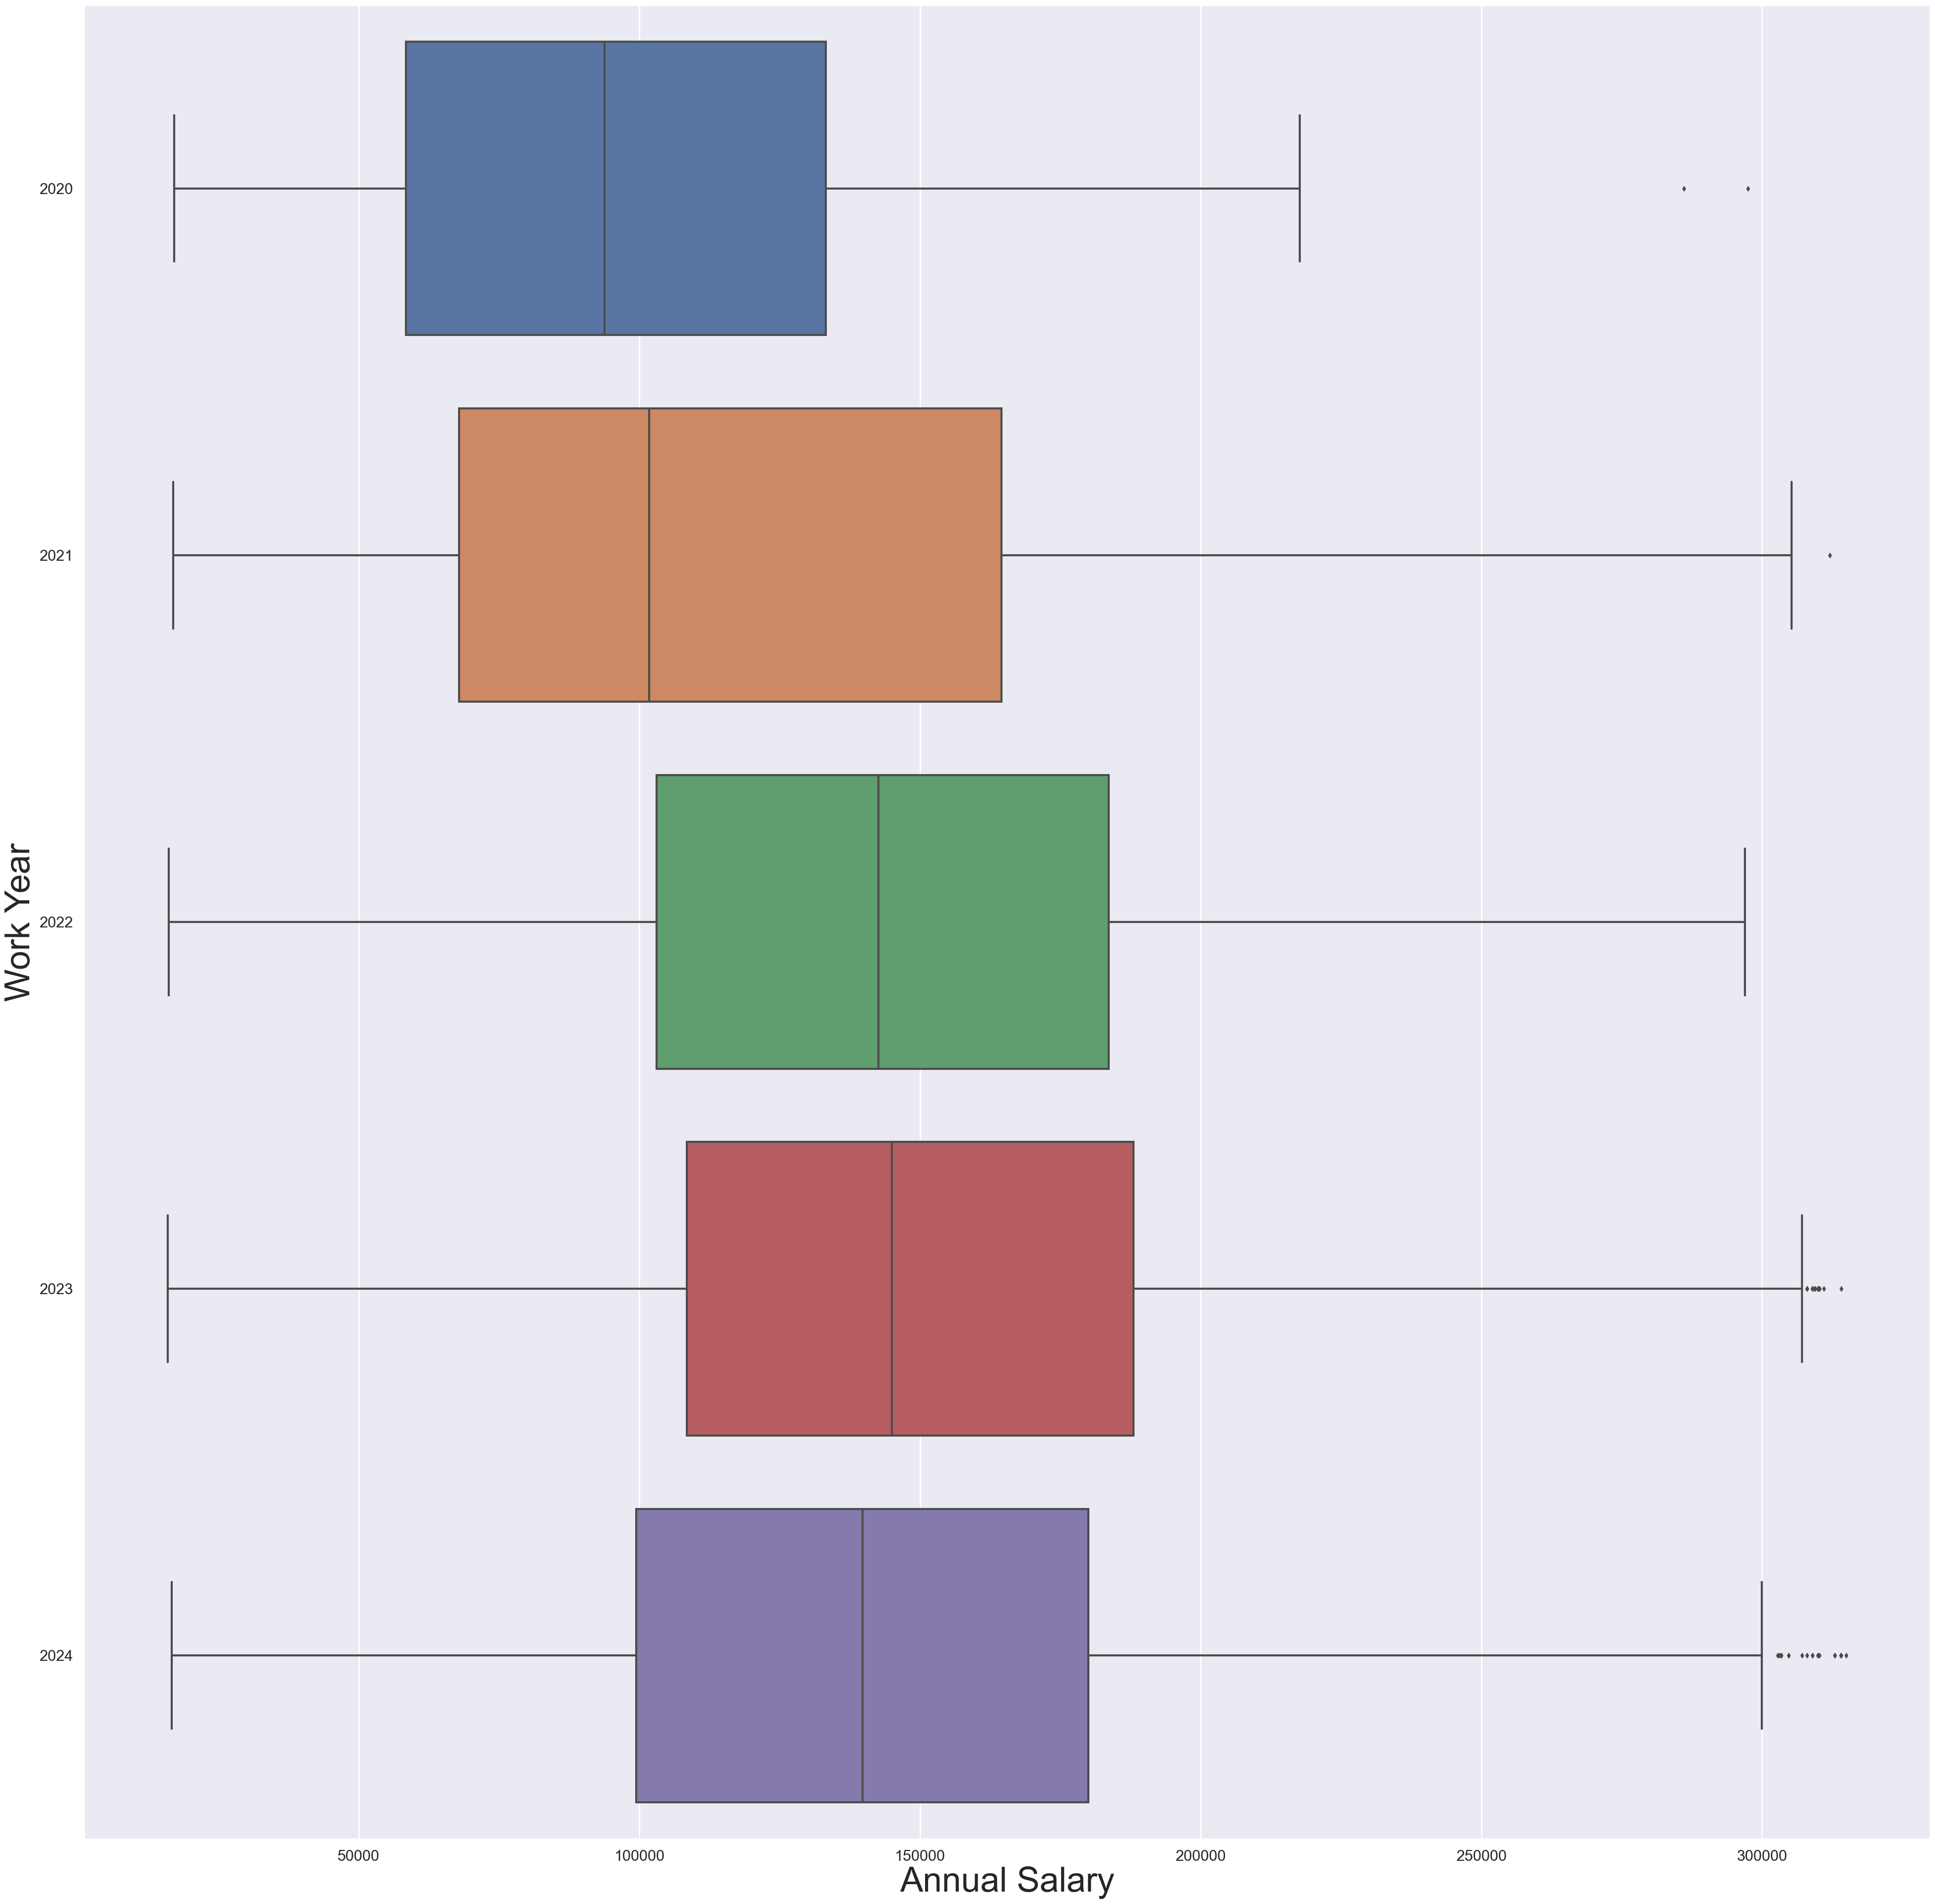

In [23]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "adjusted_salary", y = "work_year", data = cleaned_salary_Data, orient = "h",)

ax.set_xlabel("Annual Salary",fontsize=50)
ax.set_ylabel("Work Year",fontsize=50)
plt.show()

We can see the annual median salary has been increasing from 2020 to 2023 and started dropping in 2024

### Employment type vs Year and Salary

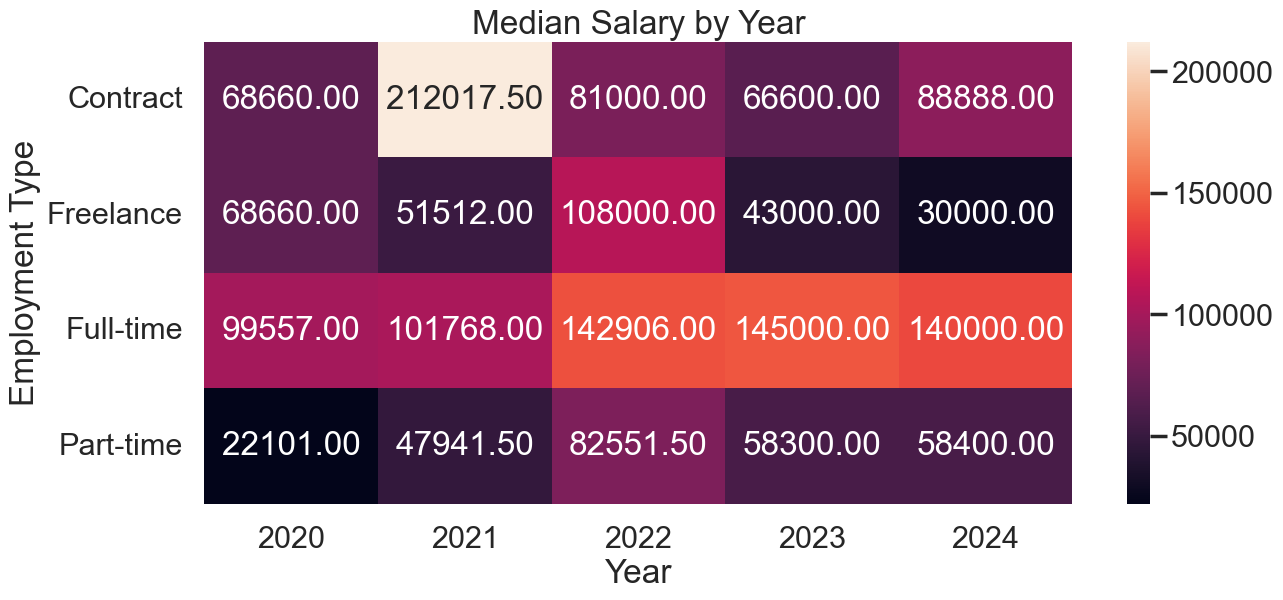

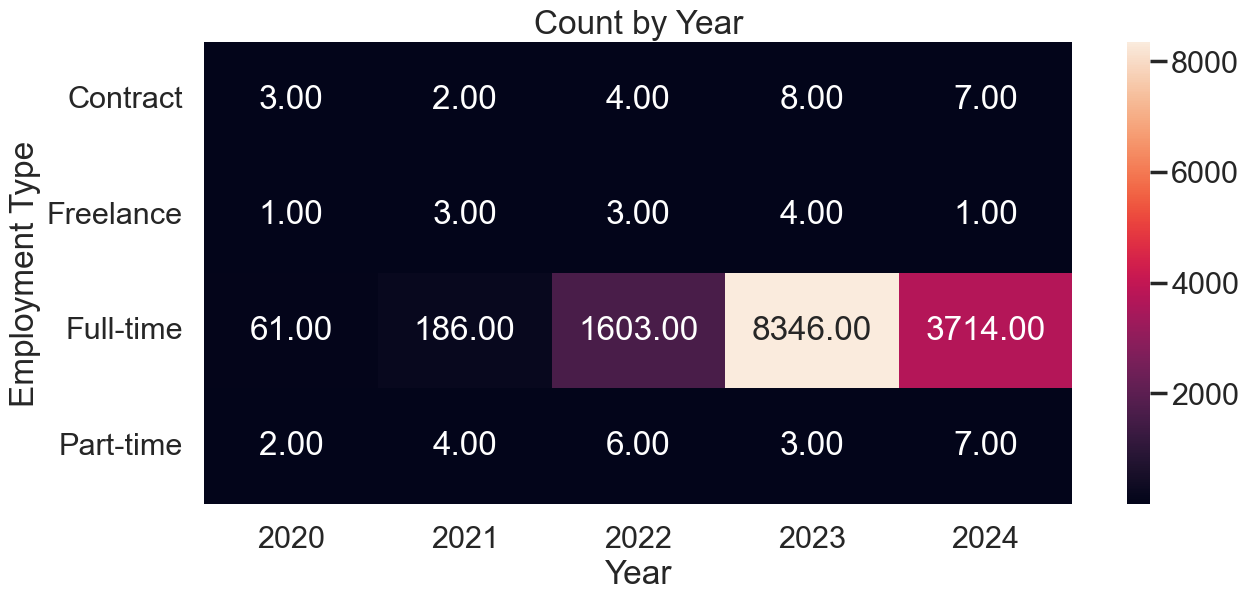

In [24]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='employment_type', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Employment Type')
plt.show()


pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='employment_type', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Employment Type')
plt.show()

### experience_level  vs Year and Salary

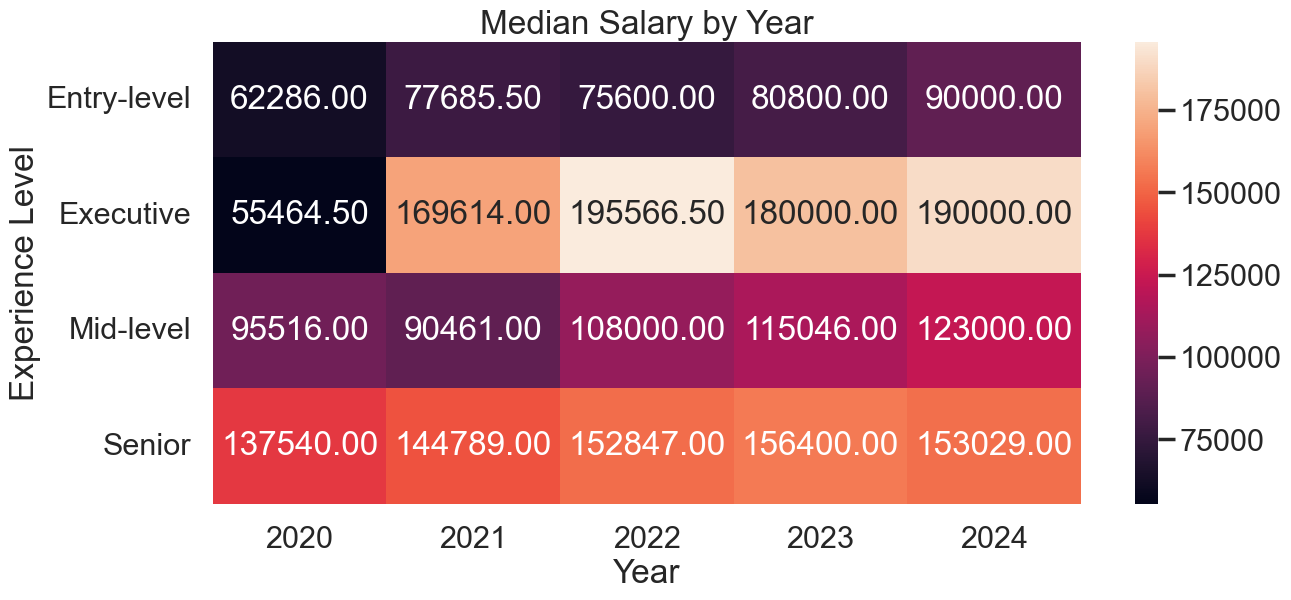

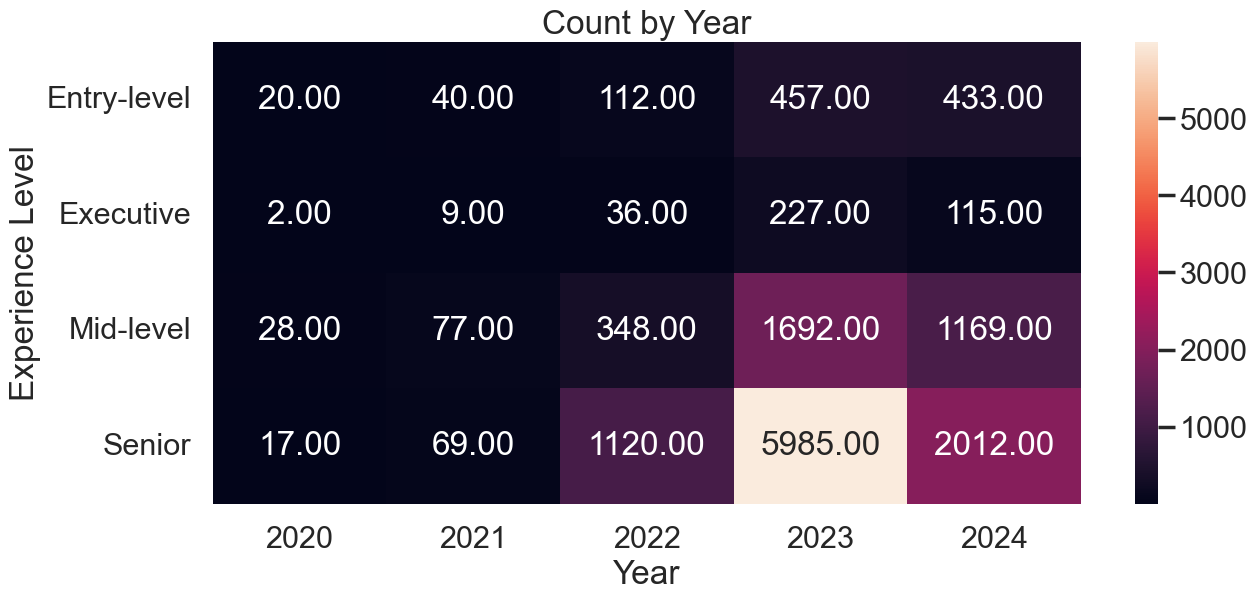

In [25]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='experience_level', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Experience Level')
plt.show()

pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='experience_level', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Experience Level')
plt.show()

### work_setting  vs Year and Salary

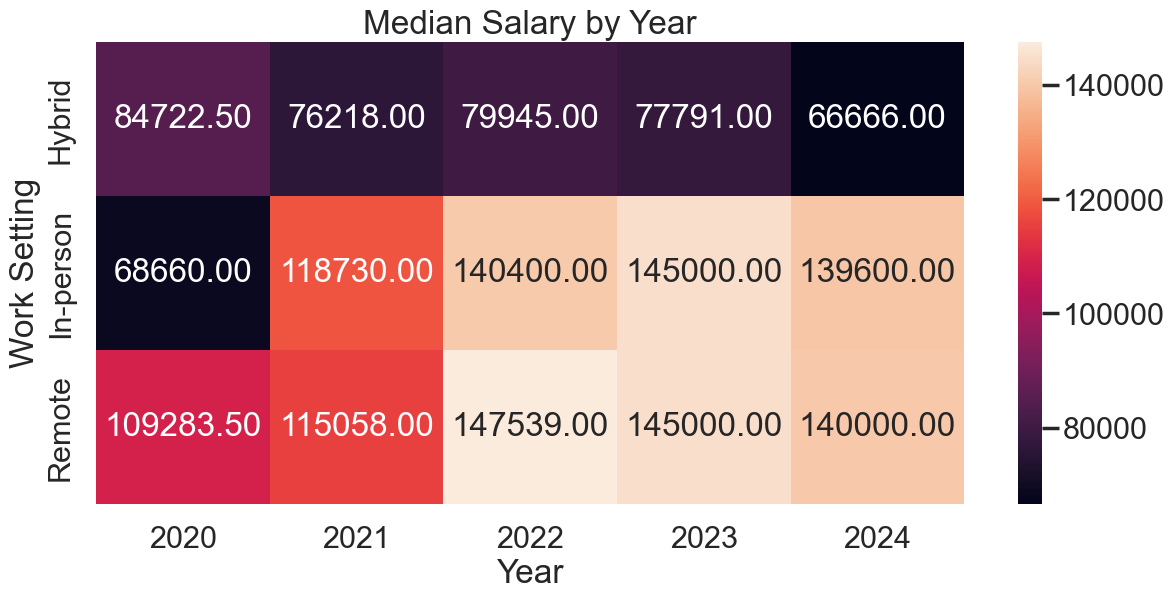

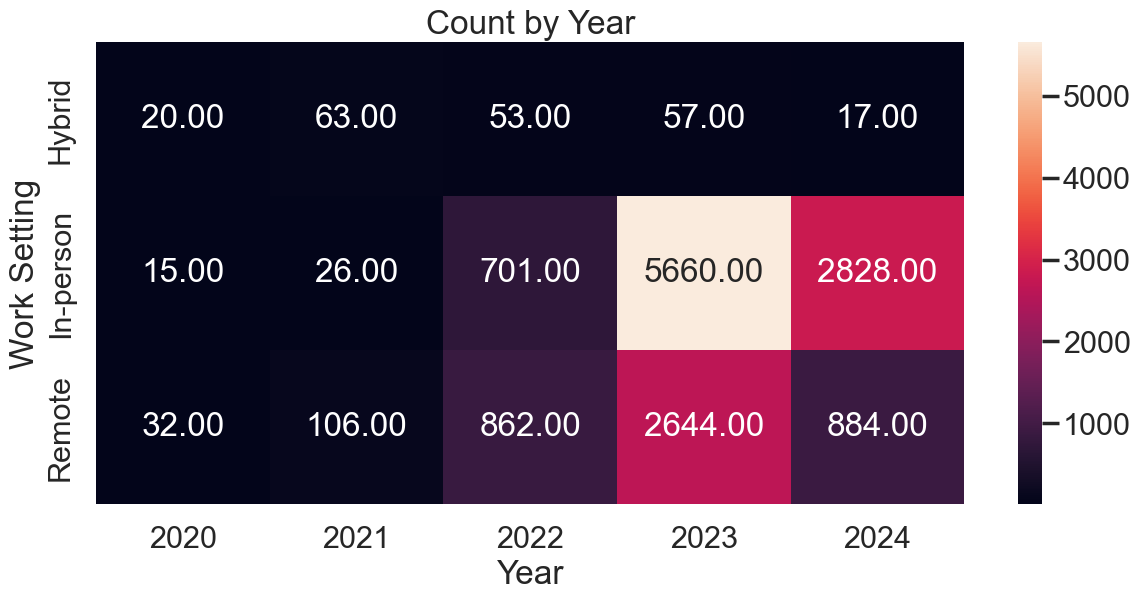

In [26]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='work_setting', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Work Setting')

plt.show()
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='work_setting', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Work Setting')
plt.show()

### job_category vs Year and Salary

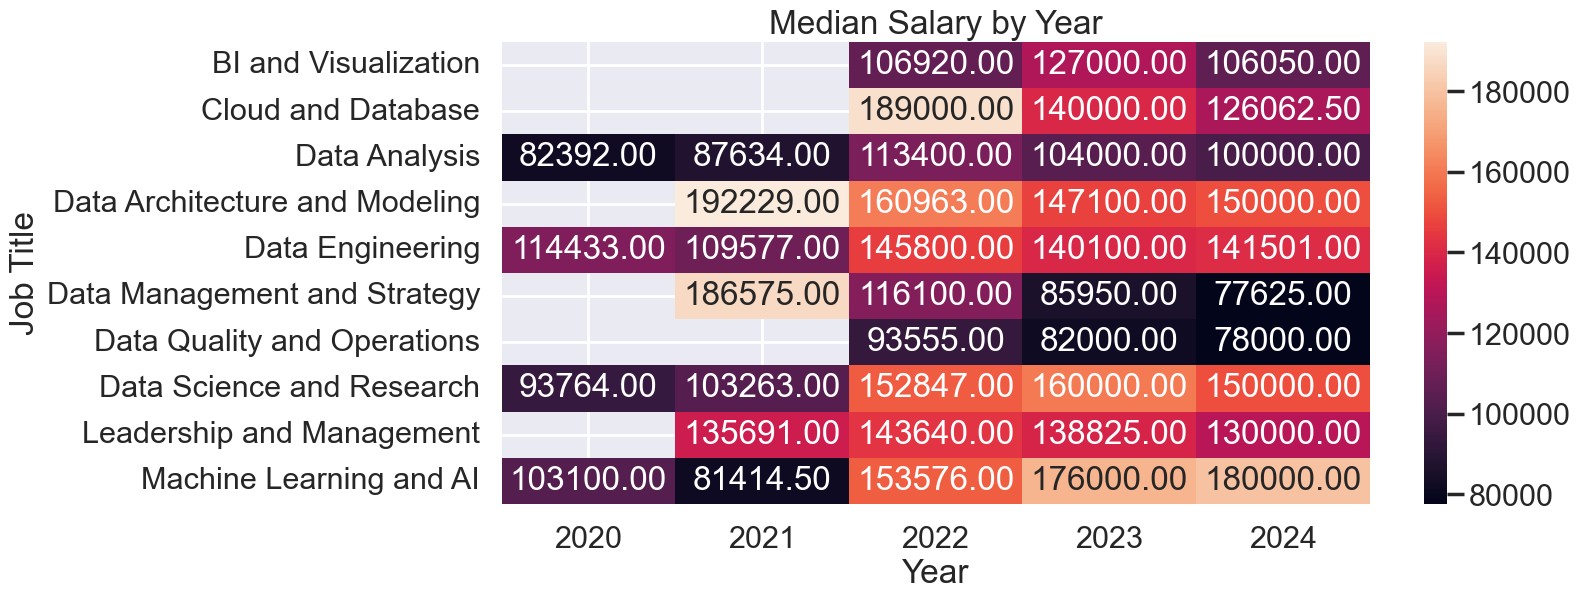

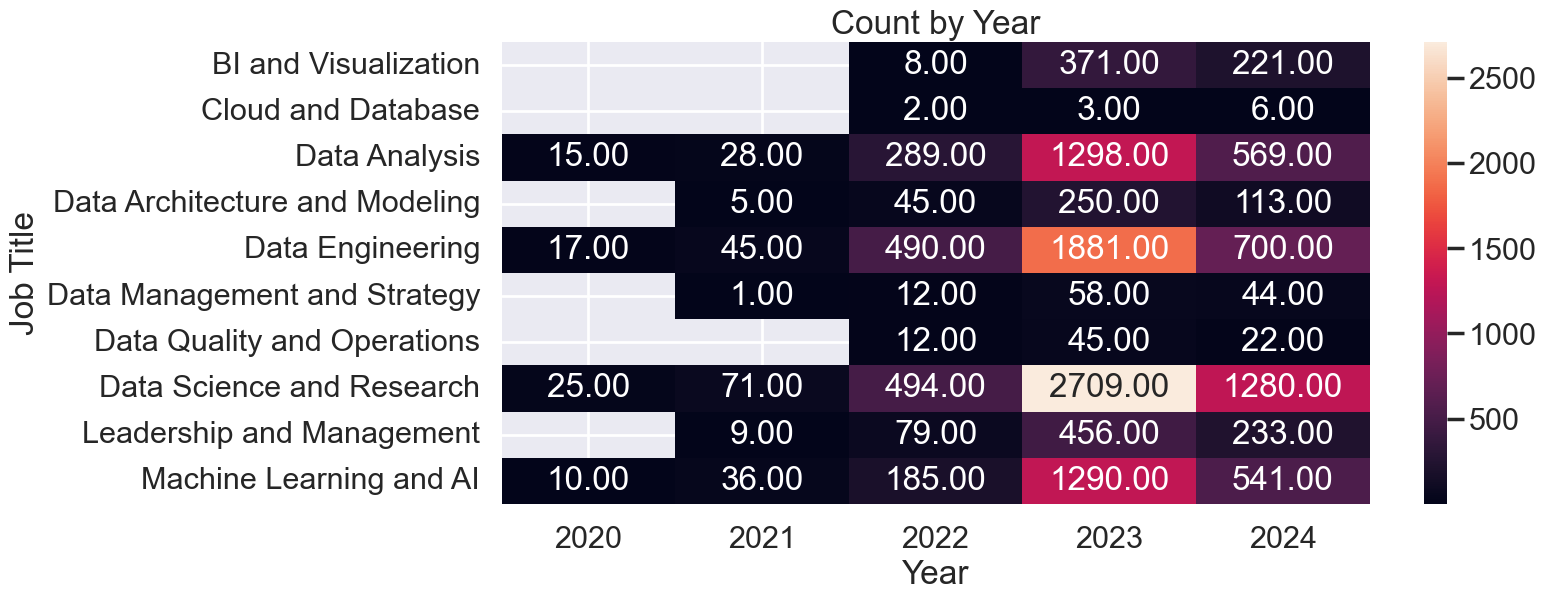

In [27]:
pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

pivot_table = cleaned_df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='count')
plt.figure(figsize=(14, 6))
sb.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

### Geo-Spatial Analysis


### Company Location vs Salary

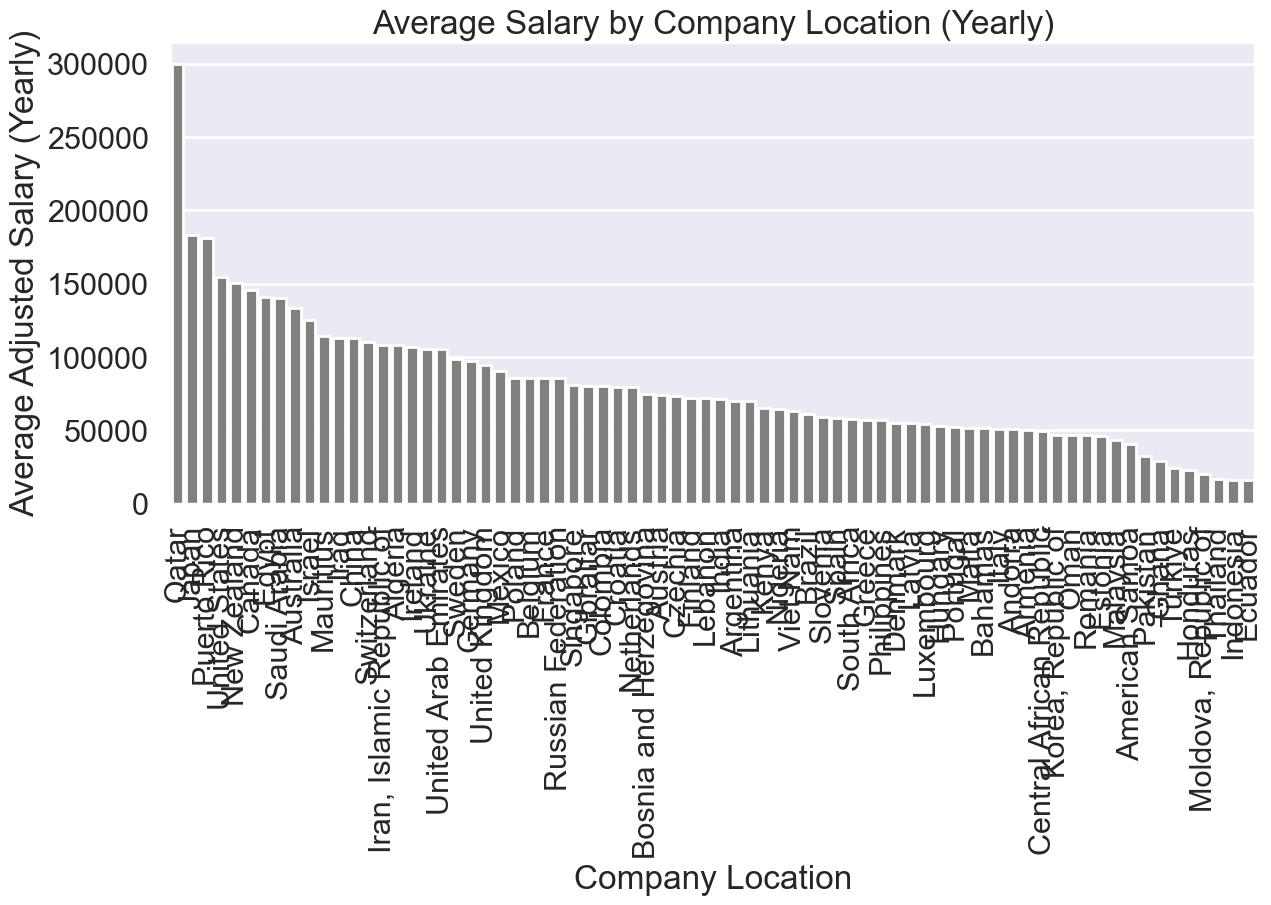

In [28]:
import plotly.express as px


avg_salary_by_location = cleaned_df.groupby('company_location', as_index=False)['adjusted_salary'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'adjusted_salary': 'Average Adjusted Salary'},
                     projection='natural earth')

fig1.show()

avg_salary_by_location = cleaned_df.groupby('company_location')['adjusted_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sb.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location, color='grey')
plt.title('Average Salary by Company Location (Yearly)')
plt.xlabel('Company Location')
plt.ylabel('Average Adjusted Salary (Yearly)')
plt.xticks(rotation=90)
plt.show()

In [29]:
country_counts = cleaned_df.groupby('company_location').count()
country_counts

work_year  experience_level  employment_type  job_title  \
company_location                                                                
Algeria                       1                 1                1          1   
American Samoa                2                 2                2          2   
Andorra                       1                 1                1          1   
Argentina                     7                 7                7          7   
Armenia                       1                 1                1          1   
...                         ...               ...              ...        ...   
Ukraine                      10                10               10         10   
United Arab Emirates          4                 4                4          4   
United Kingdom              617               617              617        617   
United States             12242             12242            12242      12242   
Viet Nam                      4                 4                4          4   

                      salary  salary_currency  salary_in_usd  \
company_location                                               
Algeria                    1                1              1   
American Samoa             2                2              2   
Andorra                    1                1              1   
Argentina                  7                7              7   
Armenia                    1                1              1   
...                      ...              ...            ...   
Ukraine                   10               10             10   
United Arab Emirates       4                4              4   
United Kingdom           617              617            617   
United States          12242            12242          12242   
Viet Nam                   4                4              4   

                      employee_residence  work_setting  company_size  \
company_location                                                       
Algeria                                1             1             1   
American Samoa                         2             2             2   
Andorra                                1             1             1   
Argentina                              7             7             7   
Armenia                                1             1             1   
...                                  ...           ...           ...   
Ukraine                               10            10            10   
United Arab Emirates                   4             4             4   
United Kingdom                       617           617           617   
United States                      12242         12242         12242   
Viet Nam                               4             4             4   

                      job_category  adjusted_salary  
company_location                                     
Algeria                          1                1  
American Samoa                   2                2  
Andorra                          1                1  
Argentina                        7                7  
Armenia                          1                1  
...                            ...              ...  
Ukraine                         10               10  
United Arab Emirates             4                4  
United Kingdom                 617              617  
United States                12242            12242  
Viet Nam                         4                4  

[74 rows x 12 columns]

### We can conclude that this data is takes place majority in the US, UK and Canada

### work_setting vs location

In [30]:
remote_100 = cleaned_df[cleaned_df['work_setting'] == 'Remote']
hybrid_100 = cleaned_df[cleaned_df['work_setting'] == 'Hybrid']
inperson_100 = cleaned_df[cleaned_df['work_setting'] == 'In-person']

all_work_settings = pd.concat([remote_100, hybrid_100, inperson_100])

# Group by country and count the occurrences of each work setting
country_counts = all_work_settings.groupby('company_location')['work_setting'].value_counts().unstack(fill_value=0)

# Find the highest work setting for each country
country_counts['highest_work_setting'] = country_counts.idxmax(axis=1)

# Create a new DataFrame with country names and highest work setting
country_summary = country_counts[['highest_work_setting']].reset_index()

# Rename columns for clarity
country_summary.columns = ['country_name', 'highest_work_setting']

# Create the choropleth map
fig = px.choropleth(country_summary, 
                    locations='country_name', 
                    locationmode='country names',
                    color='highest_work_setting', 
                    hover_name='country_name',
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    title='Highest Work Setting per Country',
                    projection='natural earth')

fig.show()

The North America, East Asia, Australia and most of european countries preferred in-person work setting while South America, Russia and East and SEA preferred remote work settings. 

### Removing factors that we think is unnecessary

In [31]:
trimmed_df = cleaned_df.drop(["salary", "salary_currency", "salary_in_usd", "employee_residence", "job_title", "company_location"], axis=1)
trimmed_df

work_year experience_level employment_type work_setting company_size  \
0           2024      Entry-level       Freelance       Remote            M   
1           2024        Executive       Full-time    In-person            M   
2           2024        Executive       Full-time    In-person            M   
3           2024           Senior       Full-time    In-person            M   
4           2024           Senior       Full-time    In-person            M   
...          ...              ...             ...          ...          ...   
14193       2021        Mid-level       Full-time       Hybrid            L   
14194       2021           Senior       Full-time       Remote            L   
14196       2021        Mid-level       Full-time       Remote            L   
14197       2020      Entry-level       Full-time       Remote            S   
14198       2020      Entry-level        Contract       Remote            L   

                         job_category  adjusted_salary  
0           Data Science and Research            30000  
1                BI and Visualization           230000  
2                BI and Visualization           176900  
3      Data Architecture and Modeling           171210  
4      Data Architecture and Modeling            92190  
...                               ...              ...  
14193                Data Engineering            32286  
14194    Data Management and Strategy           186575  
14196       Data Science and Research           170745  
14197       Data Science and Research           120155  
14198                   Data Analysis           114433  

[13968 rows x 7 columns]

In [32]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'df' with a categorical column 'Category'
le = LabelEncoder()
trimmed_df['experience_level'] = le.fit_transform(trimmed_df['experience_level'])
trimmed_df['employment_type'] = le.fit_transform(trimmed_df['employment_type'])
# trimmed_df['job_title'] = le.fit_transform(trimmed_df['job_title'])
trimmed_df['work_setting'] = le.fit_transform(trimmed_df['work_setting'])
# trimmed_df['company_location'] = le.fit_transform(trimmed_df['company_location'])
trimmed_df['company_size'] = le.fit_transform(trimmed_df['experience_level'])
trimmed_df['job_category'] = le.fit_transform(trimmed_df['job_category'])
trimmed_df

work_year  experience_level  employment_type  work_setting  \
0           2024                 0                1             2   
1           2024                 1                2             1   
2           2024                 1                2             1   
3           2024                 3                2             1   
4           2024                 3                2             1   
...          ...               ...              ...           ...   
14193       2021                 2                2             0   
14194       2021                 3                2             2   
14196       2021                 2                2             2   
14197       2020                 0                2             2   
14198       2020                 0                0             2   

       company_size  job_category  adjusted_salary  
0                 0             7            30000  
1                 1             0           230000  
2                 1             0           176900  
3                 3             3           171210  
4                 3             3            92190  
...             ...           ...              ...  
14193             2             4            32286  
14194             3             5           186575  
14196             2             7           170745  
14197             0             7           120155  
14198             0             2           114433  

[13968 rows x 7 columns]

### Features Separating

In [33]:
X = trimmed_df.drop(["adjusted_salary"], axis=1)
y = trimmed_df["adjusted_salary"]

### Spliting the dataset into train and test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape

((10476, 6), (3492, 6))

## Gradient Boosting 

In [35]:
quantiles = [0, 1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1]
bin_edges = [trimmed_df['adjusted_salary'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['low', 'low-mid', 'mid', 'mid-high', 'high', 'very-high', 'Top']
trimmed_df['salary_range'] = pd.cut(trimmed_df['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

trimmed_df

work_year  experience_level  employment_type  work_setting  \
0           2024                 0                1             2   
1           2024                 1                2             1   
2           2024                 1                2             1   
3           2024                 3                2             1   
4           2024                 3                2             1   
...          ...               ...              ...           ...   
14193       2021                 2                2             0   
14194       2021                 3                2             2   
14196       2021                 2                2             2   
14197       2020                 0                2             2   
14198       2020                 0                0             2   

       company_size  job_category  adjusted_salary salary_range  
0                 0             7            30000          low  
1                 1             0           230000          Top  
2                 1             0           176900         high  
3                 3             3           171210         high  
4                 3             3            92190      low-mid  
...             ...           ...              ...          ...  
14193             2             4            32286          low  
14194             3             5           186575    very-high  
14196             2             7           170745         high  
14197             0             7           120155          mid  
14198             0             2           114433          mid  

[13968 rows x 8 columns]

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
]

# Model training, evaluation, and selection
best_model = None
best_score = -np.inf

print("Model performance:")
for name, model in models:
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} - Accuracy: {accuracy:.2f}")
    
    if accuracy > best_score:
        best_score = accuracy
        best_model = pipeline

print(f"Best model: {best_model.named_steps['model']} with accuracy: {best_score:.2f}")

Model performance:
Logistic Regression - Accuracy: 0.03
Random Forest - Accuracy: 0.04
Best model: RandomForestClassifier() with accuracy: 0.04
